# Importing a library that is not in Colaboratory

To import a library that's not in Colaboratory by default, you can use `!pip install` or `!apt-get install`.

In [40]:
from keras.engine.sequential import Sequential
# Import packages
import tensorflow as tf
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [41]:
df = pd.read_csv("/content/pvwatts_hourly.csv", skiprows=30)
df.head(5)

,Month,Day,Hour,Beam Irradiance (W/m2),Diffuse Irradiance (W/m2),Ambient Temperature (C),Wind Speed (m/s),Albedo,Plane of Array Irradiance (kW/m2),Cell Temperature (C),DC Array Output (W),AC System Output (W)
0,1,1,0,0,0,16.0,0.5,0.27,0.0,16.0,0.0,0.0
1,1,1,1,0,0,15.6,2.1,0.27,0.0,15.6,0.0,0.0
2,1,1,2,0,0,15.1,2.1,0.27,0.0,15.1,0.0,0.0
3,1,1,3,0,0,14.8,2.1,0.27,0.0,14.8,0.0,0.0
4,1,1,4,0,0,14.4,1.0,0.27,0.0,14.4,0.0,0.0


In [42]:
# Adding year column and datetime column
df['year'] = 2022
df['datetime'] = pd.to_datetime(df[['year', 'Month', 'Day', 'Hour']])
df = df.set_index(['datetime'])
df.head(4)

,Month,Day,Hour,Beam Irradiance (W/m2),Diffuse Irradiance (W/m2),Ambient Temperature (C),Wind Speed (m/s),Albedo,Plane of Array Irradiance (kW/m2),Cell Temperature (C),DC Array Output (W),AC System Output (W),year
datetime,,,,,,,,,,,,,
2022-01-01 00:00:00,1,1,0,0,0,16.0,0.5,0.27,0.0,16.0,0.0,0.0,2022
2022-01-01 01:00:00,1,1,1,0,0,15.6,2.1,0.27,0.0,15.6,0.0,0.0,2022
2022-01-01 02:00:00,1,1,2,0,0,15.1,2.1,0.27,0.0,15.1,0.0,0.0,2022
2022-01-01 03:00:00,1,1,3,0,0,14.8,2.1,0.27,0.0,14.8,0.0,0.0,2022


In [43]:
# Train tets split
train_size = int((df.shape[0])*0.7)
valid_size = int((df.shape[0])*0.1)
train_data = df[:train_size]['DC Array Output (W)']
valid_data = df[train_size:train_size+valid_size]['DC Array Output (W)']
test_data = df[train_size+valid_size:]['DC Array Output (W)']

In [44]:
type(train_data)

pandas.core.series.Series

In [45]:
valid_data.tail(3)

datetime
2022-10-19 21:00:00    0.0
2022-10-19 22:00:00    0.0
2022-10-19 23:00:00    0.0
Name: DC Array Output (W), dtype: float64

In [46]:
test_data.head(3)

datetime
2022-10-20 00:00:00    0.0
2022-10-20 01:00:00    0.0
2022-10-20 02:00:00    0.0
Name: DC Array Output (W), dtype: float64

In [37]:
test_data[0:20]
#2022-10-20 00:00:00 2022-12-31 23:00:00

array([[-0.7723214 ],
       [-0.7723214 ],
       [-0.7723214 ],
       [-0.7723214 ],
       [-0.7723214 ],
       [-0.7723214 ],
       [-0.75233718],
       [-0.26876852],
       [ 0.57671529],
       [ 1.255557  ],
       [ 1.68943534],
       [ 1.90485382],
       [ 1.94133671],
       [ 1.74303439],
       [ 1.37557028],
       [ 0.74628276],
       [-0.06532516],
       [-0.72396772],
       [-0.7723214 ],
       [-0.7723214 ]])

In [10]:
# Scaling data
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data.values.reshape(-1,1))
valid_data = scaler.transform(valid_data.values.reshape(-1,1))
test_data = scaler.transform(test_data.values.reshape(-1,1))

In [20]:
test_data[0:20]

array([[-0.7723214 ],
       [-0.7723214 ],
       [-0.7723214 ],
       [-0.7723214 ],
       [-0.7723214 ],
       [-0.7723214 ],
       [-0.75233718],
       [-0.26876852],
       [ 0.57671529],
       [ 1.255557  ],
       [ 1.68943534],
       [ 1.90485382],
       [ 1.94133671],
       [ 1.74303439],
       [ 1.37557028],
       [ 0.74628276],
       [-0.06532516],
       [-0.72396772],
       [-0.7723214 ],
       [-0.7723214 ]])

In [11]:
test_data_inv = scaler.inverse_transform(test_data)
test_data_inv

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [12]:
test_data_inv[0:20]

array([[   0.   ],
       [   0.   ],
       [   0.   ],
       [   0.   ],
       [   0.   ],
       [   0.   ],
       [  44.629],
       [1124.54 ],
       [3012.684],
       [4528.681],
       [5497.623],
       [5978.698],
       [6060.172],
       [5617.321],
       [4796.696],
       [3391.364],
       [1578.872],
       [ 107.984],
       [   0.   ],
       [   0.   ]])

In [13]:
# Model 
model = Sequential()
model.add(LSTM(10, activation = 'relu', input_shape = (24,1)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = ['mse', 'mae'])


In [14]:
train_data.shape

(6132, 1)

In [15]:
valid_data.shape

(876, 1)

In [16]:
test_data.shape

(1752, 1)

In [17]:
# Create sequence of 24hrs for training and testing 
def create_sequence(data, seq_length):
  X = []
  y = []
  #print(len(data))
  #print(data)
  for i in range((data.shape[0])-seq_length):
    #print(i, i+seq_length)
    X.append(data[i:i+seq_length])
    y.append(data[i+seq_length])
    #break
  return np.array(X), np.array(y)

In [18]:
seq_length = 24
X_train, y_train = create_sequence(train_data, seq_length)
X_valid, y_valid = create_sequence(valid_data, seq_length)
X_test, y_test = create_sequence(test_data, seq_length)

In [22]:
y_test[0:20]

array([[-0.7723214 ],
       [-0.7723214 ],
       [-0.7723214 ],
       [-0.7723214 ],
       [-0.7723214 ],
       [-0.7723214 ],
       [-0.75254943],
       [-0.26984903],
       [ 0.53188388],
       [ 1.0559955 ],
       [ 1.35960985],
       [ 1.62619457],
       [ 1.7170149 ],
       [ 1.53522781],
       [ 1.19766817],
       [ 0.63591031],
       [-0.12183124],
       [-0.7296443 ],
       [-0.7723214 ],
       [-0.7723214 ]])

In [23]:
y_test_inv = scaler.inverse_transform(y_test)
y_test_inv[0:20]

array([[   0.   ],
       [   0.   ],
       [   0.   ],
       [   0.   ],
       [   0.   ],
       [   0.   ],
       [  44.155],
       [1122.127],
       [2912.566],
       [4083.018],
       [4761.053],
       [5356.393],
       [5559.214],
       [5153.245],
       [4399.403],
       [3144.879],
       [1452.682],
       [  95.307],
       [   0.   ],
       [   0.   ]])

In [24]:
#Model fit
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs = 50, batch_size =32)
# save the model to a file
model.save('my_model.h5')


Epoch 1/50
191/191 [==============================] - 5s 15ms/step - loss: 0.6024 - val_loss: 0.1201
Epoch 2/50
191/191 [==============================] - 4s 22ms/step - loss: 0.0667 - val_loss: 0.0352
Epoch 3/50
191/191 [==============================] - 3s 16ms/step - loss: 0.0302 - val_loss: 0.0201
Epoch 4/50
191/191 [==============================] - 2s 12ms/step - loss: 0.0170 - val_loss: 0.0086
Epoch 5/50
191/191 [==============================] - 3s 13ms/step - loss: 0.0138 - val_loss: 0.0067
Epoch 6/50
191/191 [==============================] - 3s 16ms/step - loss: 0.0129 - val_loss: 0.0048
Epoch 7/50
191/191 [==============================] - 2s 12ms/step - loss: 0.0120 - val_loss: 0.0043
Epoch 8/50
191/191 [==============================] - 2s 12ms/step - loss: 0.0115 - val_loss: 0.0043
Epoch 9/50
191/191 [==============================] - 3s 13ms/step - loss: 0.0114 - val_loss: 0.0039
Epoch 10/50
191/191 [==============================] - 2s 12ms/step - loss: 0.0111 - val_lo

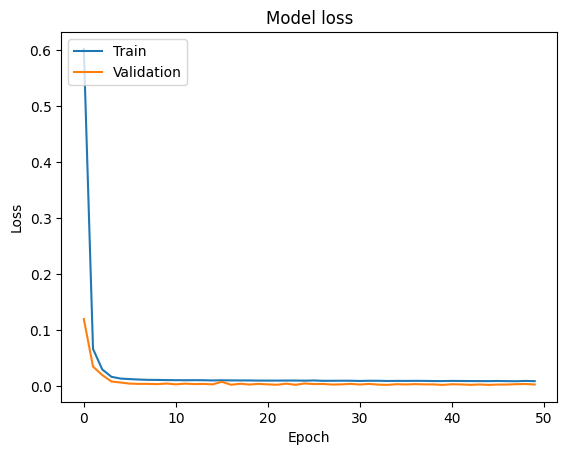

In [25]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
y_pred = model.predict(X_test)

# Invert scaling on predictions and actual values
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

# Calculate test MSE
mse = np.mean((y_pred - y_test)**2)
print('Test MSE:', mse)

# Print predictions for entire X_test dataset
print('Predictions for X_test dataset:')
print(y_pred)

In [53]:
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_pred.shape

54/54 [==============================] - 0s 3ms/step


(1728, 1)

In [56]:
pred_df = pd.DataFrame({'Actuals' : y_test.flatten(), 'Predictions' : y_pred.flatten()})
pred_df

,Actuals,Predictions
0,0.0,-2.095033
1,0.0,-15.450868
2,0.0,-28.847961
3,0.0,-40.129089
4,0.0,-42.950378
...,...,...
1723,0.0,67.551697
1724,0.0,7.822570
1725,0.0,18.039246
1726,0.0,4.547423


In [57]:
pred_df.head(20)

,Actuals,Predictions
0,0.000,-2.095033
1,0.000,-15.450868
2,0.000,-28.847961
3,0.000,-40.129089
4,0.000,-42.950378
5,0.000,-21.734558
6,44.155,83.066223
7,1122.127,1005.854980
8,2912.566,2655.931885
9,4083.018,4334.059082


In [58]:
# set start time and end time
start_time = '2022-10-21 00:00:00 '
end_time = '2022-12-31 23:00:00'

# create datetime range with hourly frequency
datetime_range = pd.date_range(start=start_time, end=end_time, freq='H')

# create DataFrame with datetime column
df_datetime = pd.DataFrame({'datetime': datetime_range})
pred_df = pd.concat([pred_df, df_datetime], axis = 1)
pred_df

,Actuals,Predictions,datetime
0,0.0,-2.095033,2022-10-21 00:00:00
1,0.0,-15.450868,2022-10-21 01:00:00
2,0.0,-28.847961,2022-10-21 02:00:00
3,0.0,-40.129089,2022-10-21 03:00:00
4,0.0,-42.950378,2022-10-21 04:00:00
...,...,...,...
1723,0.0,67.551697,2022-12-31 19:00:00
1724,0.0,7.822570,2022-12-31 20:00:00
1725,0.0,18.039246,2022-12-31 21:00:00
1726,0.0,4.547423,2022-12-31 22:00:00


In [60]:
pred_df = pred_df.set_index('datetime')
pred_df.head(20)

,Actuals,Predictions
datetime,,
2022-10-21 00:00:00,0.000,-2.095033
2022-10-21 01:00:00,0.000,-15.450868
2022-10-21 02:00:00,0.000,-28.847961
2022-10-21 03:00:00,0.000,-40.129089
2022-10-21 04:00:00,0.000,-42.950378
2022-10-21 05:00:00,0.000,-21.734558
2022-10-21 06:00:00,44.155,83.066223
2022-10-21 07:00:00,1122.127,1005.854980
2022-10-21 08:00:00,2912.566,2655.931885


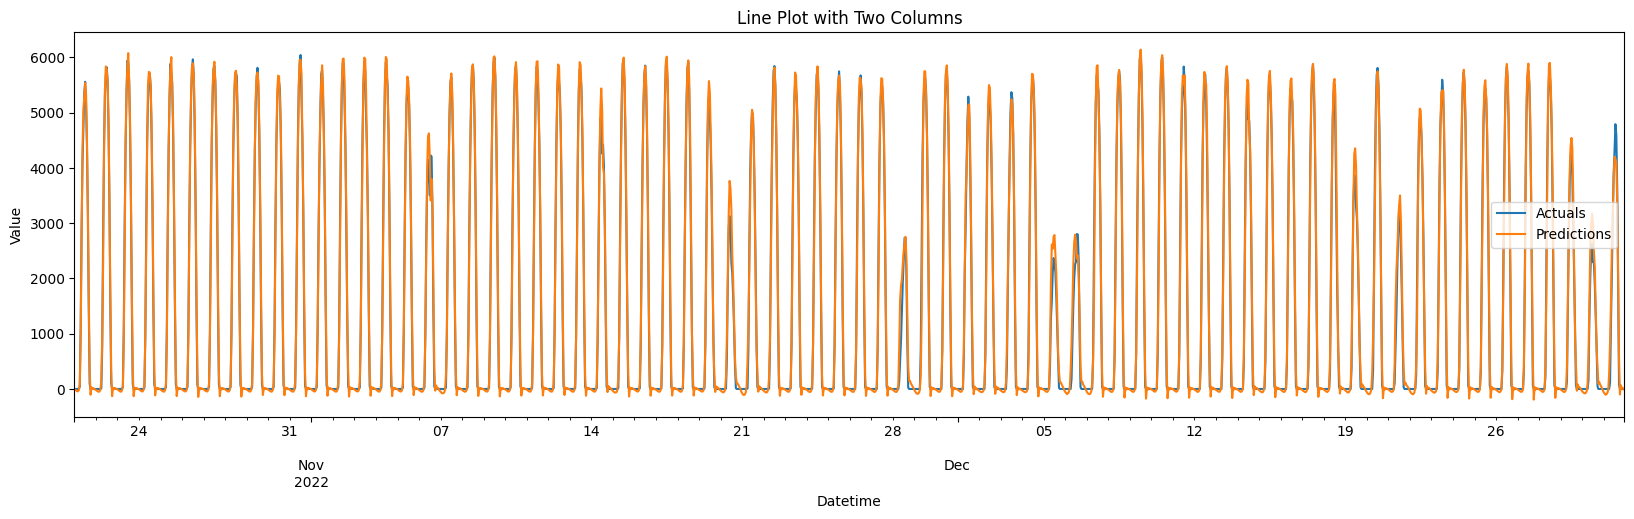

In [63]:
# plot the two columns in the same plot
ax = pred_df.plot(kind='line', figsize=(20,5))

# set plot title and axis labels
ax.set_title('Line Plot with Two Columns')
ax.set_xlabel('Datetime')
ax.set_ylabel('Value')

# display the plot
plt.show()

In [66]:
# create a line plot with two columns in the same plot
import plotly.express as px
fig = px.line(pred_df, y=['Actuals', 'Predictions'], title='Line Plot with Two Columns')

# show the plot
fig.show()

In [68]:
pred_df.to_csv("/content/Predictions.csv")

In [69]:
from google.colab import files
pred_df.to_csv('output.csv', encoding = 'utf-8-sig') 
files.download('output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>